In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [2]:
df = pd.read_csv('College_Data.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [4]:
df = pd.get_dummies(df, columns=['Private'], drop_first=True)

In [6]:
df.head(5)

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [5]:
df.columns

Index(['Unnamed: 0', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Private_Yes'],
      dtype='object')

In [7]:
x = df[[ 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Private_Yes']]

In [8]:
model = KMeans(n_clusters=3)
y_labels = model.fit_predict(x)
y_labels

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

In [9]:
centers = model.cluster_centers_
centers

array([[1.70182301e+03, 1.23653451e+03, 4.91520354e+02, 2.18194690e+01,
        4.97769912e+01, 2.22618053e+03, 6.56030088e+02, 9.28193982e+03,
        4.14370619e+03, 5.37015929e+02, 1.32979646e+03, 6.75787611e+01,
        7.51433628e+01, 1.46362832e+01, 2.09274336e+01, 7.83074690e+03,
        6.28070796e+01, 7.61061947e-01],
       [1.06216145e+04, 7.30063855e+03, 2.93942169e+03, 3.20000000e+01,
        6.34698795e+01, 1.54825060e+04, 3.17455422e+03, 8.23585542e+03,
        4.13487952e+03, 5.94349398e+02, 1.88833735e+03, 8.41566265e+01,
        8.95542169e+01, 1.64072289e+01, 1.58072289e+01, 9.44095181e+03,
        6.05060241e+01, 8.43373494e-02],
       [3.79185271e+03, 2.04663566e+03, 6.53937984e+02, 4.98372093e+01,
        7.72248062e+01, 2.57355039e+03, 2.35829457e+02, 1.69343256e+04,
        5.43727907e+03, 5.74604651e+02, 1.03575194e+03, 8.75193798e+01,
        9.33333333e+01, 1.02046512e+01, 3.51627907e+01, 1.78138140e+04,
        8.02868217e+01, 9.92248062e-01]])

In [10]:
model.inertia_

32365874710.061333

Text(0, 0.5, 'Score')

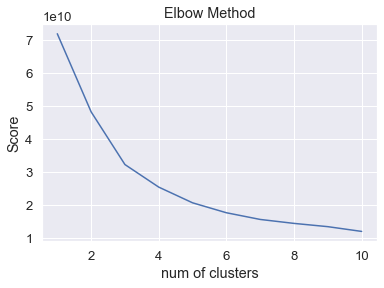

In [11]:
# choose the best number of clusters (K Value) using Elbow Method
scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    scores.append(model.inertia_)
plt.plot(range(1, 11), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [12]:
# from the scores, turns out the best clusters number is 5
model = KMeans(n_clusters=5)
y_labels = model.fit_predict(x)
y_labels

array([4, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 4, 3, 0,
       4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 0, 4, 4, 4, 4,
       1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 1, 0, 1, 4, 1, 4,
       4, 4, 4, 2, 3, 1, 1, 4, 1, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 1, 3,
       4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 0, 0, 0, 4, 1, 1, 1, 4,
       4, 4, 4, 4, 1, 1, 4, 1, 0, 4, 1, 4, 1, 1, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 0, 1, 1, 0, 4, 4, 3, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       4, 4, 4, 4, 3, 1, 4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 3, 1,
       0, 0, 4, 4, 4, 0, 4, 4, 1, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4,
       4, 4, 1, 0, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 0, 1,
       4, 1, 0, 0, 4, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 4, 1, 4, 4, 1, 4,
       1, 1, 1, 0, 4, 4, 4, 1, 3, 1, 4, 4, 1, 1, 1, 0, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 0, 1, 4, 4, 0, 2, 4, 4, 2, 1, 0, 0, 4, 4, 4, 3, 4,
       4, 1, 0, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1, 4,

In [13]:
# choose the best number of clusters using The Dendrogram
import scipy.cluster.hierarchy as sch

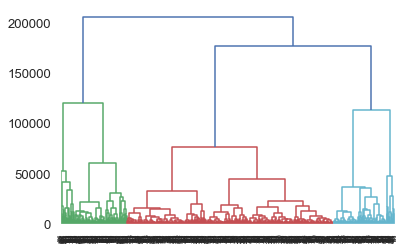

In [14]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))